In [1]:
import re
import os
import math
import nltk
import time
import re
import string
import pandas as pd
from nltk.corpus import stopwords

In [2]:
# you can use the imports below
# include any other imports you need here
# you may have to install gensim using "pip install gensim"
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [3]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [4]:
#In this body of code, we have taken first 5000 rows of our original dataset to implement a code to test Regex, data cleaning
#Tokenization, stop words elimination - all operations on the "Bio" column of the data frame so that user profile data
#can be used in further analysis in the remaining stages. 

In [5]:
#Steps to data cleaning and preparation fort the analysis
#Step 1: Go to directory, locate the excel file
#Step 2: Unicode the file , skip errors and encode 
#Step 3: Convert excel to data frame
#Step 4: Instruct it to read column 'V' 
#Step 5: get lower (V)
#Step 6: Regex
#Step 7: Tokenize
#Step 8: Stopwords

In [6]:
#Step 1: Go to directory, locate the excel file
#Step 2: Unicode the file , skip errors and encode 
#Step 3: Convert excel to data frame

In [7]:
import pandas as pd

df_dating = pd.read_excel (r'C:\Users\jeffd\Documents\Studying\Statistical Software\Final Project\Input_project_v11_age.xlsx')
print (df_dating)

       age age_group  status sex orientation       body_type  \
0       22     18_22  single   m    straight  a little extra   
1       22     18_22  single   f    straight        athletic   
2       22     18_22  single   m    straight             fit   
3       20     18_22  single   f    straight         average   
4       21     18_22  single   m    straight            thin   
...    ...       ...     ...  ..         ...             ...   
10845   65       51+  single   f    straight             fit   
10846   55       51+  single   f    straight    full figured   
10847   51       51+  single   m    straight         average   
10848   65       51+  single   f    straight           curvy   
10849   60       51+  single   m    straight         average   

                    diet    drinks  drinks_freq  drugs  ...  \
0      strictly anything  socially            1  never  ...   
1                    NaN  socially            1  never  ...   
2        mostly anything  socially        

In [8]:
#The bottom line removes all emojis from the text, this will help clean the text

In [9]:
df_dating.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,age,age_group,status,sex,orientation,body_type,diet,drinks,drinks_freq,drugs,...,job_group,last_online,location,offspring,pets,religion,sign,smokes,speaks,Bio
0,22,18_22,single,m,straight,a little extra,strictly anything,socially,1,never,...,blue_collar,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...
1,22,18_22,single,f,straight,athletic,nan,socially,1,never,...,student,2012-06-15-22-56,"san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,catholicism and somewhat serious about it,taurus but it doesn&rsquo;t matter,no,"english (fluently), spanish (fluently), italia...",my name is ashley and i live in san francisco....
2,22,18_22,single,m,straight,fit,mostly anything,socially,1,never,...,business,2012-06-10-01-37,"san francisco, california",nan,likes dogs and dislikes cats,catholicism and laughing about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), tagalog (fluently), japane...","full-time student, full-time square. i change ..."
3,20,18_22,single,f,straight,average,mostly vegetarian,socially,1,never,...,blue_collar,2012-06-30-00-00,"san rafael, california",doesn't want kids,has dogs and likes cats,nan,cancer,no,"english (fluently), spanish (fluently)","""apparently,"" has become a new favorite word o..."
4,21,18_22,single,m,straight,thin,nan,socially,1,nan,...,s.t.e.m.,2012-06-29-22-10,"san francisco, california",nan,nan,buddhism,nan,when drinking,english,"i grew up in iowa. it gets a bad rap, but let ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10845,65,51+,single,f,straight,fit,nan,socially,1,never,...,humanities_arts_entertainment,2011-08-19-18-51,"oakland, california",nan,nan,nan,libra but it doesn&rsquo;t matter,no,english (fluently),my friends describe me as a beautiful on the i...
10846,55,51+,single,f,straight,full figured,anything,rarely,0,never,...,business,2012-06-19-08-45,"half moon bay, california","has kids, but doesn't want more",dislikes cats,catholicism but not too serious about it,leo but it doesn&rsquo;t matter,no,english,"my friends would say i've got a caring, nurtur..."
10847,51,51+,single,m,straight,average,strictly anything,rarely,0,never,...,business,2012-06-30-06-26,"san francisco, california",has a kid,nan,atheism but not too serious about it,nan,sometimes,english,in the suburbs not by choice but necessity. i ...
10848,65,51+,single,f,straight,curvy,mostly anything,socially,1,never,...,other,2012-06-30-19-11,"san lorenzo, california",has kids,has dogs and has cats,catholicism and very serious about it,scorpio and it matters a lot,no,"english, english, french, spanish",i am fun loving and romantic. a bouquet of flo...


In [10]:
df_dating["Bio"] = df_dating["Bio"].str.lower()

In [11]:
type(df_dating)

pandas.core.frame.DataFrame

In [12]:
#Convert all the text in the bio-column to lower case
#Print first few rows of the data frame to test how column 'Bio' looks

In [13]:
df_dating_top = df_dating.head()
df_dating_top

,age,age_group,status,sex,orientation,body_type,diet,drinks,drinks_freq,drugs,...,job_group,last_online,location,offspring,pets,religion,sign,smokes,speaks,Bio
0,22,18_22,single,m,straight,a little extra,strictly anything,socially,1,never,...,blue_collar,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...
1,22,18_22,single,f,straight,athletic,NaN,socially,1,never,...,student,2012-06-15-22-56,"san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,catholicism and somewhat serious about it,taurus but it doesn&rsquo;t matter,no,"english (fluently), spanish (fluently), italia...",my name is ashley and i live in san francisco....
2,22,18_22,single,m,straight,fit,mostly anything,socially,1,never,...,business,2012-06-10-01-37,"san francisco, california",NaN,likes dogs and dislikes cats,catholicism and laughing about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), tagalog (fluently), japane...","full-time student, full-time square. i change ..."
3,20,18_22,single,f,straight,average,mostly vegetarian,socially,1,never,...,blue_collar,2012-06-30-00-00,"san rafael, california",doesn't want kids,has dogs and likes cats,NaN,cancer,no,"english (fluently), spanish (fluently)","""apparently,"" has become a new favorite word o..."
4,21,18_22,single,m,straight,thin,NaN,socially,1,NaN,...,s.t.e.m.,2012-06-29-22-10,"san francisco, california",NaN,NaN,buddhism,NaN,when drinking,english,"i grew up in iowa. it gets a bad rap, but let ..."


In [14]:
#Step 4: Instruct it to read column 'V' 
#Step 5: get lower (V)

In [15]:
#df['Bio'].str.lower()
bio_token1 = pd.DataFrame(df_dating, columns = ['Bio'])
print(bio_token1[0:5])

                                                 Bio
0  about me:  i would love to think that i was so...
1  my name is ashley and i live in san francisco....
2  full-time student, full-time square. i change ...
3  "apparently," has become a new favorite word o...
4  i grew up in iowa. it gets a bad rap, but let ...


In [16]:
#Step 6: Regex

In [17]:
import nltk

df_dating['Bio'] = df_dating['Bio'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df_dating['Bio'] = df_dating['Bio'].str.replace(".", "").str.replace(",", "").str.strip()
df_dating['Bio'] = df_dating['Bio'].str.replace(")", "").str.replace("(", "").str.strip()
df_dating['Bio'] = df_dating['Bio'].str.replace("!@#$%^&*\(\)\[]\{};:,./<>?\|`~=_+", "").str.strip()


In [18]:
df_dating_top = df_dating.head()
df_dating_top

,age,age_group,status,sex,orientation,body_type,diet,drinks,drinks_freq,drugs,...,job_group,last_online,location,offspring,pets,religion,sign,smokes,speaks,Bio
0,22,18_22,single,m,straight,a little extra,strictly anything,socially,1,never,...,blue_collar,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me i would love to think that i was some...
1,22,18_22,single,f,straight,athletic,NaN,socially,1,never,...,student,2012-06-15-22-56,"san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,catholicism and somewhat serious about it,taurus but it doesn&rsquo;t matter,no,"english (fluently), spanish (fluently), italia...",my name is ashley and i live in san francisco ...
2,22,18_22,single,m,straight,fit,mostly anything,socially,1,never,...,business,2012-06-10-01-37,"san francisco, california",NaN,likes dogs and dislikes cats,catholicism and laughing about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), tagalog (fluently), japane...",fulltime student fulltime square i change from...
3,20,18_22,single,f,straight,average,mostly vegetarian,socially,1,never,...,blue_collar,2012-06-30-00-00,"san rafael, california",doesn't want kids,has dogs and likes cats,NaN,cancer,no,"english (fluently), spanish (fluently)",apparently has become a new favorite word of m...
4,21,18_22,single,m,straight,thin,NaN,socially,1,NaN,...,s.t.e.m.,2012-06-29-22-10,"san francisco, california",NaN,NaN,buddhism,NaN,when drinking,english,i grew up in iowa it gets a bad rap but let me...


In [22]:
df_dating = df_dating[df_dating['Bio'].notna()]

In [23]:
len(df_dating['Bio'])

10551

In [24]:
type(df_dating['Bio'])
dating_bio_list = df_dating["Bio"].tolist()

In [25]:
type(dating_bio_list)

list

In [26]:
dating_age_group_list = df_dating['age_group'].tolist()

In [27]:
type(dating_age_group_list)

list

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split


from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from nltk.corpus import stopwords
import string

In [29]:
CNN_X_train_age, CNN_X_test_age, CNN_y_train_age, CNN_y_test_age = (
train_test_split(dating_bio_list, dating_age_group_list, test_size=0.2))

In [30]:
len(CNN_X_train_age)

8440

In [31]:
len(CNN_X_test_age)

2111

In [32]:
len(CNN_y_train_age)

8440

In [33]:
len(CNN_y_test_age)

2111

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

In [39]:
dating_model_age_CNN = make_pipeline(TfidfVectorizer(), MLPClassifier(hidden_layer_sizes=(100,), verbose=True))
dating_model_age_CNN_history = dating_model_age_CNN.fit(CNN_X_train_age, CNN_y_train_age)
pred_labels_age_CNN = dating_model_age_CNN.predict(CNN_X_test_age)

Iteration 1, loss = 1.73236035
Iteration 2, loss = 1.46619609
Iteration 3, loss = 1.14109484
Iteration 4, loss = 0.83531045
Iteration 5, loss = 0.58670159
Iteration 6, loss = 0.40398819
Iteration 7, loss = 0.27999755
Iteration 8, loss = 0.19892193
Iteration 9, loss = 0.14581935
Iteration 10, loss = 0.11070518
Iteration 11, loss = 0.08603599
Iteration 12, loss = 0.06882996
Iteration 13, loss = 0.05608843
Iteration 14, loss = 0.04669493
Iteration 15, loss = 0.03965370
Iteration 16, loss = 0.03426694
Iteration 17, loss = 0.03002977
Iteration 18, loss = 0.02674287
Iteration 19, loss = 0.02407144
Iteration 20, loss = 0.02192114
Iteration 21, loss = 0.02011844
Iteration 22, loss = 0.01863619
Iteration 23, loss = 0.01737293
Iteration 24, loss = 0.01629437
Iteration 25, loss = 0.01536615
Iteration 26, loss = 0.01455770
Iteration 27, loss = 0.01385575
Iteration 28, loss = 0.01324794
Iteration 29, loss = 0.01270220
Iteration 30, loss = 0.01221760
Iteration 31, loss = 0.01178441
Iteration 32, los

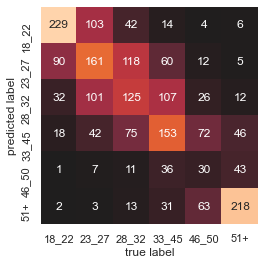

In [40]:
from sklearn.metrics import confusion_matrix
mat_CNN_age = confusion_matrix(CNN_y_test_age, pred_labels_age_CNN)
sorted_labels = list(set(CNN_y_test_age))
sorted_labels.sort()
sns.heatmap(mat_CNN_age.T, square=True, annot=True, fmt='d', cbar=False, center=True,
            xticklabels=sorted_labels, yticklabels=sorted_labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [43]:
from sklearn.metrics import f1_score
print(f1_score(CNN_y_test_age, pred_labels_age_CNN, average='macro'))
print(f1_score(CNN_y_test_age, pred_labels_age_CNN, average='micro'))
print(f1_score(CNN_y_test_age, pred_labels_age_CNN, average='weighted'))

0.4174128217307702
0.43391757460918995
0.4291644802857361


In [ ]:
## Architecture #2

In [49]:
dating_model_age_CNN_2 = make_pipeline(TfidfVectorizer(), MLPClassifier(hidden_layer_sizes=(100,100,100), verbose=True))
dating_model_age_CNN_history_2 = dating_model_age_CNN_2.fit(CNN_X_train_age, CNN_y_train_age)
pred_labels_age_CNN_2 = dating_model_age_CNN_2.predict(CNN_X_test_age)

Iteration 1, loss = 1.72902185
Iteration 2, loss = 1.20609256
Iteration 3, loss = 0.60824428
Iteration 4, loss = 0.21509311
Iteration 5, loss = 0.05531283
Iteration 6, loss = 0.01656621
Iteration 7, loss = 0.00755649
Iteration 8, loss = 0.00454099
Iteration 9, loss = 0.00317882
Iteration 10, loss = 0.00229436
Iteration 11, loss = 0.00182980
Iteration 12, loss = 0.00155394
Iteration 13, loss = 0.00137879
Iteration 14, loss = 0.00127213
Iteration 15, loss = 0.00119668
Iteration 16, loss = 0.00114422
Iteration 17, loss = 0.00110412
Iteration 18, loss = 0.00107276
Iteration 19, loss = 0.00104608
Iteration 20, loss = 0.00102350
Iteration 21, loss = 0.00100378
Iteration 22, loss = 0.00098381
Iteration 23, loss = 0.00096051
Iteration 24, loss = 0.00093678
Iteration 25, loss = 0.00091605
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


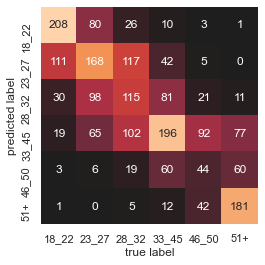

In [50]:
from sklearn.metrics import confusion_matrix
mat_CNN_age_2 = confusion_matrix(CNN_y_test_age, pred_labels_age_CNN_2)
sorted_labels = list(set(CNN_y_test_age))
sorted_labels.sort()
sns.heatmap(mat_CNN_age_2.T, square=True, annot=True, fmt='d', cbar=False, center=True,
            xticklabels=sorted_labels, yticklabels=sorted_labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [51]:
from sklearn.metrics import f1_score
print(f1_score(CNN_y_test_age, pred_labels_age_CNN_2, average='macro'))
print(f1_score(CNN_y_test_age, pred_labels_age_CNN_2, average='micro'))
print(f1_score(CNN_y_test_age, pred_labels_age_CNN_2, average='weighted'))

0.4270142942424677
0.43202273803884417
0.4373899851383531
